In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fires-from-space-australia-and-new-zeland/fire_nrt_V1_96617.csv
/kaggle/input/fires-from-space-australia-and-new-zeland/fire_archive_V1_96617.csv
/kaggle/input/fires-from-space-australia-and-new-zeland/fire_nrt_M6_96619.csv
/kaggle/input/fires-from-space-australia-and-new-zeland/fire_archive_M6_96619.csv


In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

#### Welcome to the notebook! 

This involves a full-fledged analysis and application of ML algorithms on the Fires from Space dataset.

##### The notebook has two sections

1. Some basic data exploration
2. Application of ML algorithms

#### 1. Data Exploration

The essential part to any data analytics problem is to attain some insights that can be achieved using few analytical methods that are to be applied on the given dataset.

**Import and read dataset**

In [3]:
# Read in data and view description
df = pd.read_csv("../input/fires-from-space-australia-and-new-zeland/fire_nrt_M6_96619.csv")
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,25,Terra,MODIS,70,6.0NRT,302.3,26.8,D
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,25,Terra,MODIS,90,6.0NRT,306.3,84.3,D
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,25,Terra,MODIS,30,6.0NRT,305.0,14.1,D
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,25,Terra,MODIS,57,6.0NRT,303.3,18.4,D
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,25,Terra,MODIS,94,6.0NRT,304.7,110.7,D


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183593 entries, 0 to 183592
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    183593 non-null  float64
 1   longitude   183593 non-null  float64
 2   brightness  183593 non-null  float64
 3   scan        183593 non-null  float64
 4   track       183593 non-null  float64
 5   acq_date    183593 non-null  object 
 6   acq_time    183593 non-null  int64  
 7   satellite   183593 non-null  object 
 8   instrument  183593 non-null  object 
 9   confidence  183593 non-null  int64  
 10  version     183593 non-null  object 
 11  bright_t31  183593 non-null  float64
 12  frp         183593 non-null  float64
 13  daynight    183593 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 19.6+ MB


In [5]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight'],
      dtype='object')

**Size and checking for null and unique values within the dataset**

In [6]:
#number of rows and columns of the dataset
df.shape

(183593, 14)

In [7]:
#checking for null values

df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

There are no null values in the dataset.

In [8]:
df['daynight'].unique()

array(['D', 'N'], dtype=object)

In [9]:
df['satellite'].unique()

array(['Terra', 'Aqua'], dtype=object)

In [10]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,25,Terra,MODIS,70,6.0NRT,302.3,26.8,D
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,25,Terra,MODIS,90,6.0NRT,306.3,84.3,D
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,25,Terra,MODIS,30,6.0NRT,305.0,14.1,D
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,25,Terra,MODIS,57,6.0NRT,303.3,18.4,D
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,25,Terra,MODIS,94,6.0NRT,304.7,110.7,D


**Label Encoding**

In [11]:
y = df['confidence']
fin = df.drop(['confidence', 'daynight','acq_date', 'acq_time','version','satellite','instrument' ,'bright_t31'], axis = 1)

<AxesSubplot:>

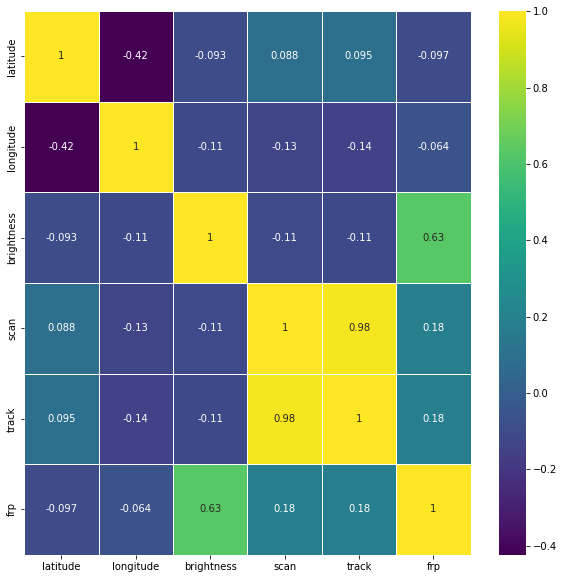

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

### Random Forest

In [14]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

#Fit
random_model.fit(Xtrain, ytrain)
y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.22 %


### SVM Regressor

In [ ]:
svr = SVR()
svr.fit(Xtrain, ytrain)
y_pred2 = svr.predict(Xtest)

### MLP Regressor

In [ ]:
model = MLPRegressor()
model.fit(Xtrain, ytrain)


In [ ]:
expected_y  = ytest
predicted_y = model.predict(Xtest)

In [ ]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))